<details closed>
<summary><h1>Overview</h1></summary>
    High level overview..
    
   
    Note :->>
    
    We will solve most of those challenges that we often face in real world..
    we will focus primarily on each & every part of data science life-cycle..
    
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline
        g) hypertune ml model..along with cross validation

  </details>

## 1. Reading the data

In [ ]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    Since data is in form of excel file we have to use pandas read_excel to load the data


In [ ]:
# Load in the raw data
training_data = pd.read_excel(r"/content/sample_data/Data_Train.xlsx")

In [ ]:
training_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [ ]:
training_data.shape

(10683, 11)

In [ ]:
training_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 2. Missing values (Cleansing and Transforming raw data)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<details>

```
10 features belong to object data-type , ie.. in context to Python , they belong to string data-type


1 feature belong to int64 nature  , ie
Variations of int are : ('int64','int32','int16') in numpy library..



Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits to store data


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits to store data


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits to store data

The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than
32 bit floats.They also allow much larger numbers to be stored..



The memory usage of a DataFrame (including the index) is shown when calling the info().
A configuration option, display.memory_usage (see the list of options), specifies if the DataFrame’s memory usage
 will be displayed when invoking the df.info() method..

memory usage: 918.2+ KB
The + symbol indicates that the true memory usage could be higher,
because pandas does not count the memory used by values in columns with dtype=object


Passing memory_usage='deep' will enable a more accurate memory usage report .

```



In [ ]:
## After loading it is important to check null/missing values in a column or a row
## Missing value :  values which occur when no data is recorded for an observation..

training_data.isnull().sum()

## training_data.isnull().sum(axis=0)
## by-default axis is 0 , ie it computes total missing values column-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Checking the columns that indicate missing values ( can use .isnull() or .isna() )
training_data[training_data['Total_Stops'].isnull()] ; training_data[training_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
# Drop the rows with missing values
training_data.dropna(inplace=True)

In [ ]:
# Verify that empty rows were dropped
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<h2> Now lets verify that the data has the proper data types and transforming any needed data to the proper types in order to use it later on

In [ ]:
# Verifying data types
training_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
### We can specify memory_usage="deep", for pandas to perform a more thorough analysis of the DataFrame's memory consumption. It calculates the memory usage considering the actual memory occupied by the underlying data structures. This can be especially useful when dealing with DataFrames containing large or complex data types.
training_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB



---

<span style="font-size: 20px;"> Here we can see that the data in the `Dep_Time`, `Arrival_Time` , and `Date_of_Journey` columns are of data type 'object' so we should convert them into 'DateTime'

<h2> Transforming data to proper data types :

In [ ]:
# Create function to convert data types to DateTime
def change_to_Datetime(col):
    training_data[col] = pd.to_datetime(training_data[col])

In [ ]:
training_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Convert data types
for i in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_to_Datetime(i)

<ipython-input-15-f4d1077d95da>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  training_data[col] = pd.to_datetime(training_data[col])


In [ ]:
# Verifying that data types were successfully converted
training_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

<h2> Visualizing the data

In [ ]:
# Updated data
training_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-10-09 18:05:00,2023-10-09 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-10-09 16:50:00,2023-10-09 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-10-09 19:55:00,2023-10-09 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-10-09 20:45:00,2023-10-09 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-10-09 08:20:00,2023-10-09 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-10-09 11:30:00,2023-10-09 14:10:00,2h 40m,non-stop,No info,12648


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(training_data, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(training_data, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(training_data, *['Source'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(training_data, *['Destination'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(training_data, *['Total_Stops'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(training_data, *['Source', 'Destination'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(training_data, *['Destination', 'Total_Stops'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(training_data, *['Price', 'Source'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(training_data, *['Price', 'Destination'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(training_data, *['Price', 'Total_Stops'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Source'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Destination'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Total_Stops'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'count()', 'Source'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'count()', 'Source'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Total_Stops'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Destination'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(training_data, *['Date_of_Journey', 'Price', 'Source'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(training_data, *['Price'], **{})
chart

> <h2> Heatmap

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.subplots(figsize=(7 * figscale, 7 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })

  ax = sns.heatmap(df_2dhist, cmap=mpl_palette_name)

  # Add a label to the heatmap legend
  cbar = ax.collections[0].colorbar
  # cbar.set_label('Flight Count', rotation=270, labelpad=30)
  cbar.ax.set_title('Flight Count', pad=20)

  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  plt.title("Airline Flights Heatmap")
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(training_data, *['Source', 'Destination'], **{})
chart


<h4>Using visualization tools like the charts above can help us get a better understanding of large data sets, such as this one with more than 10,500 rows of data, that we would not be able to otherwise see from looking at the raw data alone.</h4>

<h3>From the heatmap above we can see that:</h3>

*   The `most` common flights taken throughout the year were from `Delhi` to `Cochin`
*   The `least` common were from `Chennai` to `Kolkata`

<br/>


<h3>How is this information useful?</h3>

<details>
<summary> Some ways that this information may be useful to an Airline for example: </summary>

1. Route Optimization: Knowing the most common and least common flight routes helps the airline optimize its flight scheduling and resource allocation. For the popular Delhi to Cochin route, the airline may consider increasing the frequency of flights, using larger aircraft, or offering more amenities to cater to the higher demand. Conversely, for the less common Chennai to Kolkata route, the airline may assess whether it's cost-effective to continue offering the route or if adjustments are needed.

2. Pricing Strategy: Airlines often adjust ticket prices based on demand. For the popular Delhi to Cochin route, the airline might have a different pricing strategy compared to the less common Chennai to Kolkata route. They can set competitive prices for the common routes to attract more passengers and may employ dynamic pricing strategies to maximize revenue for the less common routes.

3. Marketing and Promotion: Airlines can use this information to target their marketing efforts. They might focus their advertising and promotions on the popular routes, offering special deals and incentives to travelers on those routes, while also considering marketing strategies to increase awareness and interest in the less common routes.

4. Resource Allocation: Airlines allocate their resources based on demand. More flight crews, ground staff, and maintenance teams might be stationed at airports with high-demand routes. Understanding the popularity of routes helps the airline allocate its resources efficiently to ensure smooth operations.

5. Aircraft Assignment: Airlines may assign specific types of aircraft to routes based on passenger demand. Larger planes with more seating capacity might be deployed on high-demand routes like Delhi to Cochin, while smaller aircraft could be used for less common routes to minimize operating costs.

6. Network Expansion: If there is a notable discrepancy between the demand for certain routes, it can inform the airline's decisions regarding network expansion or reduction. They might consider opening new routes between popular destinations or discontinuing routes with consistently low demand.
</details>

<br/>

<details>
<summary> Some ways that this information may be useful to an Investment Firm: </summary>

1. Market Research: Understanding which flight routes are popular and which are less common can provide insights into travel trends and the economic activities between different cities or regions. Investment firms can use this information to identify potential investment opportunities in sectors related to travel, tourism, and regional economic development.

2. Industry Analysis: By analyzing the popularity of specific flight routes, investment firms can gain insights into the health and competitiveness of the airline industry. For example, if a particular route is consistently popular, it may indicate strong demand for air travel, which could be a positive signal for airlines and related industries such as aircraft manufacturing, airport infrastructure, and travel technology companies.

3. Investment Strategy: Knowledge of travel patterns can inform investment strategies. For instance, an investment firm might consider investing in airlines or travel-related companies that serve popular routes, anticipating potential growth in demand and revenue for those companies.

4. Geographic Expansion: If an investment firm is considering investing in or advising a travel-related company, they can use this information to assess whether the company's expansion plans align with the popularity of flight routes. Investing in a company that plans to expand its services along popular routes might be seen as a strategic move.

5. Risk Assessment: Understanding the popularity of flight routes can also help investment firms assess risks. For instance, routes with high demand may have more competition, potentially impacting pricing and profitability. Conversely, routes with low demand may carry higher operational risks for airlines serving them.

6. Infrastructure Investments: Investment firms interested in infrastructure development might use this data to identify airports and regions with increasing demand for air travel. This could inform investment decisions related to airport expansions, upgrades, or new infrastructure projects.

7. Consumer Behavior and Trends: Analyzing travel patterns can provide insights into consumer behavior and preferences. Investment firms can use this information to assess broader consumer trends and make investment decisions related to sectors influenced by travel, such as hospitality, e-commerce, or consumer goods.

8. Global Economic Insights: The popularity of international flight routes can provide insights into global economic ties and trade relationships between countries. Investment firms can use this information to assess geopolitical risks and opportunities.
</details>

<br><br>

---



## 3. Data Pre-processing & extracting Derived attributes from "Date_of_Journey"
        Lets extract derived attributes from "Date_of_Journey" and fetch day, month, and year.

In [ ]:
data = training_data.copy()

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662


In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our
     model will not be able to understand these string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

In [ ]:
'''
In date-time , we have 4 data-types in Pandas :
datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)

where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')
## True

'''

'\nIn date-time , we have 4 data-types in Pandas :\ndatetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype(\'<M8[ns]\')\n     means ‘big-endian’  , < is little-endian\n     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..\n     (u is type-character code for unsigned integer)\n\nwhere ,   UTC = Coordinated Universal Time\n          ns  = nano second\n          tz  = time zone\n          M =  M is a character of Data-time , just like int we have i for "Integer" ,\n\n\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\nnp.dtype(\'datetime64[ns]\') == np.dtype(\'<M8[ns]\')\n## True\n\n'

In [ ]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [ ]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [ ]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [ ]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-09 18:05:00,2023-10-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-09 16:50:00,2023-10-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2023-10-09 19:55:00,2023-10-09 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2023-10-09 20:45:00,2023-10-09 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2023-10-09 08:20:00,2023-10-09 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2023-10-09 11:30:00,2023-10-09 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


## 4. Cleaning `Dep_Time` & `Arrival_Time` & then extracting derived attributes

In [ ]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year'],
      dtype='object')

In [ ]:
# Departure time is when a plane leaves the gate.

extract_hour_min(data , "Dep_Time")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [ ]:
extract_hour_min(data , "Arrival_Time")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
data.shape

(10682, 15)

## 5. Analysing when will most of the flights take-off..

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [ ]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format that we would like.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

<Axes: >

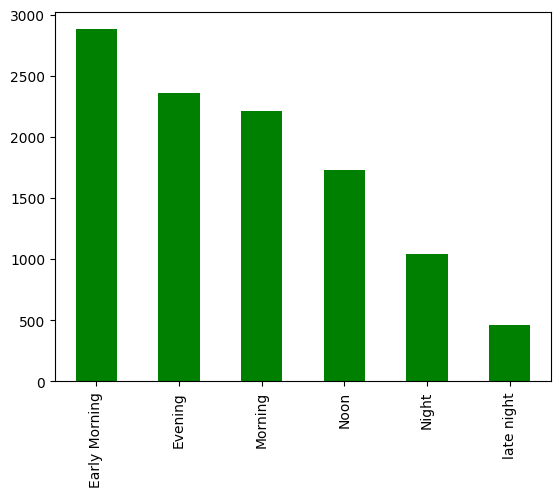

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [ ]:
#### Using Cufflinks & plotly to make above graph interactive

In [ ]:
##!pip install plotly
##!pip install chart_studio

In [ ]:
##!pip install cufflinks

In [ ]:
## how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## 6. Pre-process Duration Feature & extract meaningful features from it..

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    bcz it is string data so any how we have to convert it into numerical(integer of float) values

'''

'\n    Now after pre-processing duration feature , still my ml_model is not able to understand duration\n    bcz it is string data so any how we have to convert it into numerical(integer of float) values\n\n'

In [ ]:
data['Duration'][0]

'2h 50m'

In [ ]:
'2h 50m'.split(' ')

['2h', '50m']

In [ ]:
'2h 50m'.split(' ')[0]

'2h'

In [ ]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [ ]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [ ]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [ ]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [ ]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [ ]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


## 7.. Lets Analyse whether Duration impacts Price or not ?

In [ ]:
data['Duration'] ## convert duration into total minutes duration ..

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
2*60

120

In [ ]:
'2*60'

'2*60'

In [ ]:
eval('2*60')

120

In [ ]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [ ]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

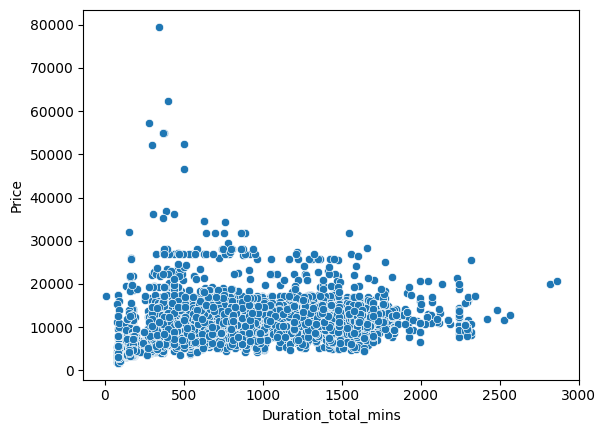

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

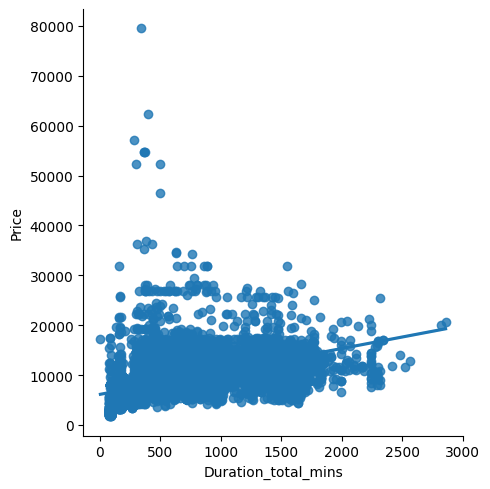

In [ ]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [ ]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

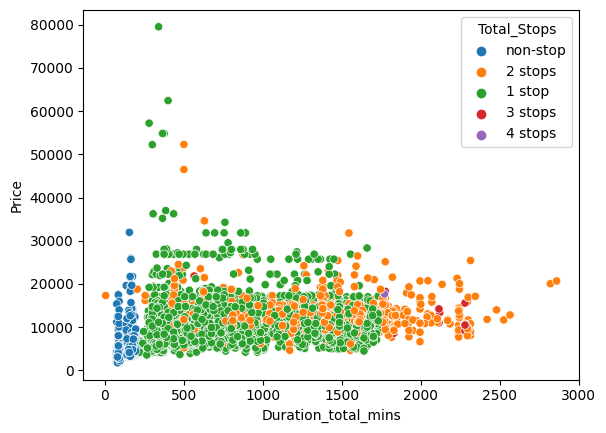

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [ ]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases (in most of the cases)

'''

'\nNon stops flights take less duration while their fare is also low, then as the stop increases,\nduration also increases and price also increases(in most of the cases)\n\n'

## 8.. on which route Jet Airways is extremely used?

In [ ]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### b. Performing Airline vs Price Analysis..
        ie find price distribution & 5-point summary of each Airline..

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

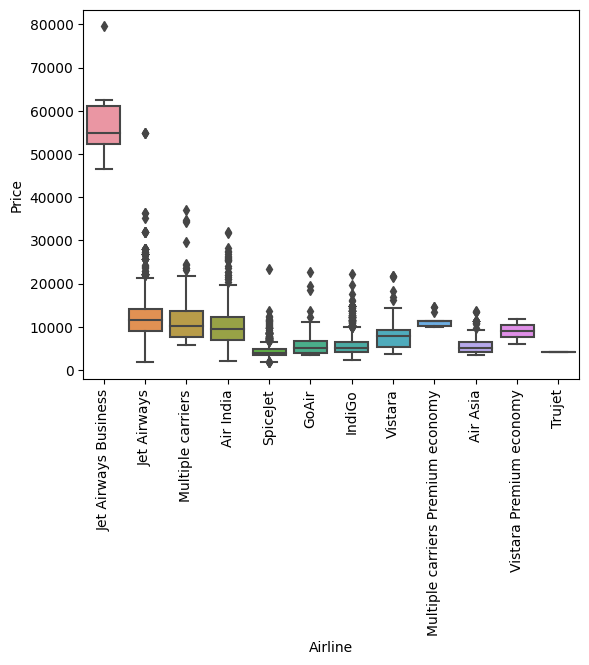

In [ ]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
'''

Conclusion--> From graph we can see that Jet Airways Business have the highest Price.,
              Apart from the first Airline almost all are having similar median

'''

'\n\nConclusion--> From graph we can see that Jet Airways Business have the highest Price.,\n              Apart from the first Airline almost all are having similar median\n\n'

## 9.. Applying one-hot Encoding on data..

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [ ]:
'''

Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, educational level,blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..

Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !

For example, salary levels and performance classifications are discrete variables,
whereas height and weight are continuous variables.

'''

'\n\nCategorical data refers to a data type that can be stored into groups/categories/labels\nExamples of categorical variables are  age group, educational level,blood type etc..\n\n\nNumerical data refers to the data that is in the form of numbers,\nExamples of numerical data are height, weight, age etc..\n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.\n                In case of infinity, these numbers will keep going on...\n                age of a fly : 8 , 9 day etc..\n\nContinuous data : which is continuous in nature\n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n\nFor example, salary levels and performance classifications are discrete variables,\nwhereas height and weight are continuous variables.\n\n'

In [ ]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [ ]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label ,
    hence we will discuss more interesting approaches in upcoming sessions to do this !

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
### Applying One-hot from scratch :

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [ ]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0


## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [ ]:
'''

Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !


'''

'\n\nNow on 2 features , Airline & Destination , we can apply on-hot as there is no such order\nbut total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..\nsimilarly if we have any feature which have more categories , it is not good to apply one-hot as it will create\ncurse of dimensionality issue , which leads to usage of more resources of your pc..\n\nSo we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !\n\n\n'

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0


In [ ]:
data['Airline'].nunique()

12

In [ ]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
'''

till now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar)
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

but in future , these conditions may change..


'''

'\n\ntill now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar)\nwhich is neighbouring part of Delhi so we will consider New Delhi & Delhi as same\n\nbut in future , these conditions may change..\n\n\n'

In [ ]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination'] = data['Destination'].map(dict_dest)

In [ ]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0


## 11.. Perform Label(Manual) Encoding on Data

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [ ]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### b.. Remove Un-necessary features

In [ ]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0


In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [ ]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,...,23,30,5,25,325,0,1,0,0,0


In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Journey_year'].unique()

array([2019])

In [ ]:
'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

'\n\nlets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..\nAdditional_Info contains almost 80% no_info , so we can drop this column ..\nlets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"\nLets drop "Source" feature as well as we have already perform feature encoding on this Feature\nlets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..\n\n'

In [ ]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

KeyError: ignored

In [ ]:
data.columns

In [ ]:
data.head(4)

In [ ]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [ ]:
data.head(3)

In [ ]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..

In [ ]:
data.head(3)

## 12. Lets Perform outlier detection !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [ ]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

In [ ]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR
          


In [ ]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [ ]:
print(maximum)

In [ ]:
print(minimum)

In [ ]:
print([price for price in data['Price'] if price> maximum or price<minimum])

In [ ]:
len([price for price in data['Price'] if price> maximum or price<minimum])

### b.. How to deal with Outlier

In [ ]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

In [ ]:
plot(data , 'Price')

## 13.. Lets Perform feature selection

In [ ]:
'''
    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable.


    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features

'''

In [ ]:
X = data.drop(['Price'] , axis=1)

In [ ]:
y = data['Price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp = mutual_info_regression(X , y)

In [ ]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''


In [ ]:
imp

In [ ]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [ ]:
imp_df.columns = ['importance']

In [ ]:
imp_df

In [ ]:
imp_df.sort_values(by='importance' , ascending=False)

## 14. Building the ML model

#### split dataset into train & test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
ml_model.fit(X_train , y_train)

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test , y_pred)

### b. Saving the model

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [ ]:
!pip install pickle

In [ ]:
import pickle

In [ ]:
# open a file, where you want to store the data
file = open(r'./Datasets/rf_random.pkl' , 'wb')

In [ ]:
# dump information to that file
pickle.dump(ml_model , file)

In [ ]:
model = open(r'./Datasets/rf_random.pkl' , 'rb')

In [ ]:
forest = pickle.load(model)

In [ ]:
y_pred2 = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test , y_pred2)

## 15.. How to automate ml pipeline & How to define your Evaluation metric..

### a.. how to make our own metric...

In [ ]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(y_test , y_pred)

### b. How to automate ml pipeline !

In [ ]:
'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--

    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

In [ ]:
from sklearn import metrics

In [ ]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

In [ ]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
predict(DecisionTreeRegressor())

## 16.. how to hypertune ml model

In [ ]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics
## & based on domain expertise knowledge Then I can say ya this model perfoms best

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model
    4.Check best parameters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [ ]:
np.linspace(start =100 , stop=1200 , num=6)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [ ]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}

In [ ]:
random_grid

In [ ]:

## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [ ]:
rf_random.fit(X_train , y_train)

In [ ]:
rf_random.best_params_

In [ ]:
#### In your case , may be your parameters may vary a little bit , thats not a major issue..

In [ ]:
rf_random.best_estimator_

In [ ]:
rf_random.best_score_